# KNN & Regularization

## Bias-Variance tradeoff

The bias-variance tradeoff is a central problem in supervised learning. Ideally, one wants to choose a model that both accurately captures the regularities in its training data, but also generalizes well to unseen data. Unfortunately, it is typically impossible to do both simultaneously. High-variance learning methods may be able to represent their training set well but are at risk of overfitting to noisy or unrepresentative training data. In contrast, algorithms with high bias typically produce simpler models that don't tend to overfit but may underfit their training data, failing to capture important regularities.

Models with high variance are usually more complex (e.g. higher-order regression polynomials), enabling them to represent the training set more accurately. In the process, however, they may also represent a large noise component in the training set, making their predictions less accurate – despite their added complexity. In contrast, models with higher bias tend to be relatively simple (low-order or even linear regression polynomials) but may produce lower variance predictions when applied beyond the training set.

$$
\begin{equation*}
	\underbrace{E_{\mathbf{x}, y, D} \left[\left(h_{D}(\mathbf{x}) - y\right)^{2}\right]}_\mathrm{Expected\;Test\;Error} = \underbrace{E_{\mathbf{x}, D}\left[\left(h_{D}(\mathbf{x}) - \bar{h}(\mathbf{x})\right)^{2}\right]}_\mathrm{Variance} + \underbrace{E_{\mathbf{x}, y}\left[\left(\bar{y}(\mathbf{x}) - y\right)^{2}\right]}_\mathrm{Noise} + \underbrace{E_{\mathbf{x}}\left[\left(\bar{h}(\mathbf{x}) - \bar{y}(\mathbf{x})\right)^{2}\right]}_\mathrm{Bias^2}
\end{equation*}
$$

**Variance**: Captures how much your classifier changes if you train on a different training set. How "over-specialized" is your classifier to a particular training set (overfitting)?

**Bias**: This is due to your classifier being "biased" to a particular kind of solution (underfitting)

**Noise**: irreducible error, is the noise term in the true relationship that cannot fundamentally be reduced by any model.


Source: http://scott.fortmann-roe.com/docs/BiasVariance.html

<img src="https://i.imgur.com/ssAwUQc.png" width="50%"/>

We can create a graphical visualization of bias and variance using a bulls-eye diagram. Imagine that the center of the target is a model that perfectly predicts the correct values. As we move away from the bulls-eye, our predictions get worse and worse. Imagine we can repeat our entire model building process to get a number of separate hits on the target. Each hit represents an individual realization of our model, given the chance variability in the training data we gather. Sometimes we will get a good distribution of training data so we predict very well and we are close to the bulls-eye, while sometimes our training data might be full of outliers or non-standard values resulting in poorer predictions.

<img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png"/>

At its root, dealing with bias and variance is really about dealing with over- and under-fitting. Bias is reduced and variance is increased in relation to model complexity. As more and more parameters are added to a model, the complexity of the model rises and variance becomes our primary concern while bias steadily falls. **More complex models overfit while the simplest models underfit**.

### Detecting High Bias and High Variance

**High Bias**: *Training error is high*
* Use more complex model (e.g. kernel methods)
* Adding features

**High Variance**: *Training error is much lower than test error*
* Add more training data
* Reduce the model complexity (e.g. Regularization)

# Regularizations for linear model

Increasing a model's complexity will increase the chance to be overfit. In contrast, reducing a model's complexity increase the chance to be underfit. This is also known as the bias/variance trade-off.

Regularization is a good way to reduce overfit. For linear model, regularization is typically achieved by penalizing large individual weights. A regularization term is added to the cost funnction.

**L2 Regularization** (or Ridge Regression in Linear Regression):

$$
L_2 = ||w||_2^2 = \sum_{j=1}^nw_j^2
$$

Ridge Regression:

$$
min_w \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} + \alpha ||w||_2^2
$$

**L1 Regularization** (or Lasso Regression in Linear Regression):

$$
L_1 = ||w||_1 = \sum_{j=1}^n|w_j|
$$

Lasso Regression:

$$
min_w \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} + \alpha ||w||_1
$$

**Elastic Net** (a middle ground between Ridge Regression and Lasso Regression)

$$
min_w \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2} + \alpha r ||w||_1 + 0.5\alpha(1-r)||w||_2^2
$$

* $\alpha = 0$ is equivalent to an ordinary least square, solved by Linear Regression
* $0 \leq r \leq 1$, for $r=0 \rightarrow$ Ridge Regression, for $r=1 \rightarrow$ Lasso Regression. For $0 < r < 1$, the penalty is a combination of L1 and L2.
* This is equivalent to $a||w||_1 + b ||w||_2^2$ where $\alpha=a+b$ and $r = \frac{a}{a+b}$


### Example

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/overfitting_underfitting_dataset.csv')

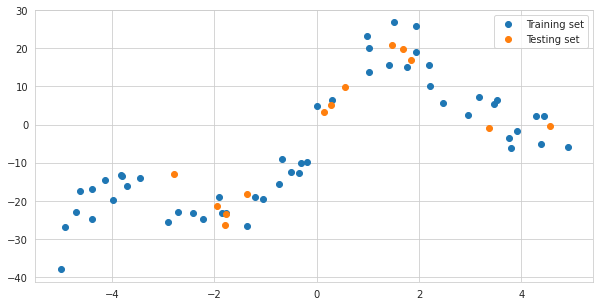

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

sns.set_style('whitegrid')

x = df[['X']].values
y = df[['Y']].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=102)

poly_reg = PolynomialFeatures(degree=100)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
x_plot = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
x_plot_poly = poly_reg.fit_transform(x_plot)

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='Training set')
plt.scatter(X_test, y_test, label='Testing set')
plt.legend()
plt.show()

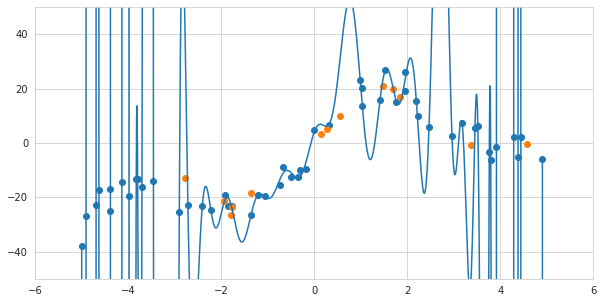

In [4]:
# Linear Regression model
lm = LinearRegression(normalize=True)
lm.fit(X_train_poly, y_train)

y_plot = lm.predict(x_plot_poly)
plt.figure(figsize=(10, 5))
plt.plot(x_plot, y_plot)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlim(-6, 6)
plt.ylim(-50, 50)
plt.show()

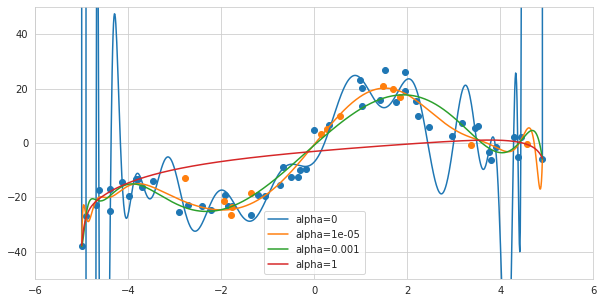

In [5]:
# Ridge regression

alphas = [0, 1e-5, 1e-3, 1]
ridge_models = [Ridge(alpha=alpha, normalize=True) for alpha in alphas]

plt.figure(figsize=(10, 5))

for i, model in enumerate(ridge_models):
    model.fit(X_train_poly, y_train)
    y_plot = model.predict(x_plot_poly)
    plt.plot(x_plot, y_plot, label=f'alpha={alphas[i]}')

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlim(-6, 6)
plt.ylim(-50, 50)
plt.legend()
plt.show()

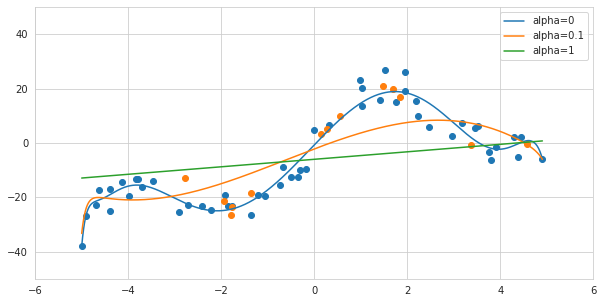

In [6]:
# Lasso regression

alphas = [0, 0.1, 1]
lasso_models = [Lasso(alpha=alpha, normalize=True) for alpha in alphas]

plt.figure(figsize=(10, 5))

for i, model in enumerate(lasso_models):
    model.fit(X_train_poly, y_train)
    y_plot = model.predict(x_plot_poly)
    plt.plot(x_plot, y_plot, label=f'alpha={alphas[i]}')

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlim(-6, 6)
plt.ylim(-50, 50)
plt.legend()
plt.show()

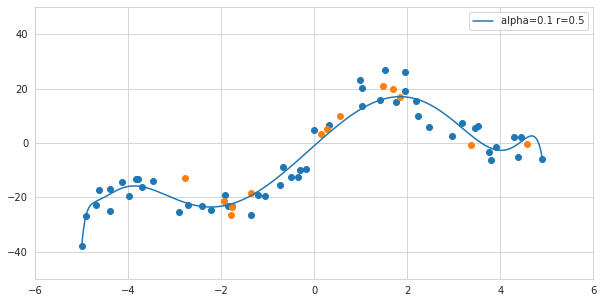

In [7]:
alpha = 0.1
r = 0.5
elastic_net = ElasticNet(alpha=alpha, l1_ratio=r)
elastic_net.fit(X_train_poly, y_train)
plt.figure(figsize=(10, 5))
y_plot = elastic_net.predict(x_plot_poly)
plt.plot(x_plot, y_plot, label=f'alpha={alpha} r={r}')
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlim(-6, 6)
plt.ylim(-50, 50)
plt.legend()
plt.show()

**Estimated coefficients**

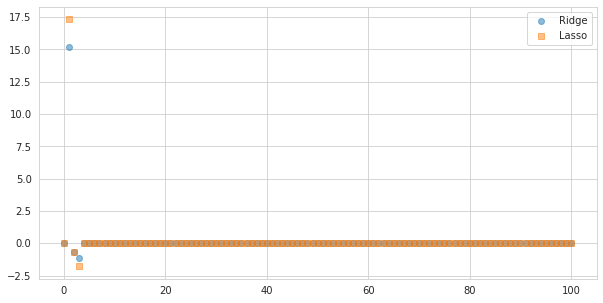

In [8]:
ridge = Ridge(alpha=1e-3, normalize=True)
ridge.fit(X_train_poly, y_train)
lasso = Lasso(alpha=1e-3, normalize=True)
lasso.fit(X_train_poly, y_train)

ridge_coefficients = ridge.coef_[0]
lasso_coefficients = lasso.coef_
plt.figure(figsize=(10, 5))
plt.scatter(range(len(ridge_coefficients)), ridge_coefficients, marker='o', alpha=0.5, label='Ridge')
plt.scatter(range(len(lasso_coefficients)), lasso_coefficients, marker='s', alpha=0.5, label='Lasso')
plt.legend()
plt.show()

# K-Nearest Neighbors

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("ticks")

## Definition

**Asumption**: similar inputs have similar outputs

KNN is a *non-parametric* classifier algorithms. It simply looks at the K points in the training set that are nearest to the input x, and assign the most common label to the output. This method is also called instance-based learning. Formal definition:

<br/>

$$
h(x) = mode(\{y: (x, y) \in S_x\}) \\
\\
\text{ where $S_x$ is the set of the k nearest neighbors of $x$,} \\
\text{$mode()$ means to select the label of the highest occurence}
$$


<div align="center">
    <img src="https://i.imgur.com/TO1HvCA.png" />
<div>


**Parametric vs Non-parametric algorithms**

A **parametric** algorithm has a constant set of parameters, which is independent of the number of training set. In contrast, the number of parameters of a **non-parametric** algorithm is proportional to the size of the training set. Examples, Logistic Regression is parametric and KNN is non-parametric.

Parametric models have the advantage of often being faster to predict, but the disadvantage of making stronger assumptions about the data distribution. Non-parametric models are more flexible, but often computationally expensive.

###  The distance function

KNN relies on a distance metric. The better that metric reflects label similarity, the better the classified will be. The most common choice is the **Minkowski** distance:

$$
dist(x, x') = \Big( \sum_{i=1}^{n}{|x_i - x'_i|^p}\Big)^{1/p} 
$$

* **$p=1$**, **Manhattan distance**, or **$L_1$ distance**, or **$L_1$ norm**

$$
dist(x, x') = \sum_{i=1}^{n}{|x_i - x'_i|}
$$

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/200px-Manhattan_distance.svg.png)

* **$p=2$**, **Euclidean distance**, or **$L_2$ distance**, or **$L_2$ norm**

$$
dist(x, x') = \sqrt{\sum_{i=1}^{n}{(x_i - x'_i)^2}}
$$

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Euclidean_distance_3d_2_cropped.png/330px-Euclidean_distance_3d_2_cropped.png)

* In the limiting case of p reaching infinity

$$
lim_{p \rightarrow \infty}\Big( \sum_{i=1}^{n}{|x_i - x'_i|^p}\Big)^{1/p} = max_{i=1}^{n}|x_i - x'_i|
$$

$$
lim_{p \rightarrow -\infty}\Big( \sum_{i=1}^{n}{|x_i - x'_i|^p}\Big)^{1/p} = min_{i=1}^{n}|x_i - x'_i|
$$

### Demo

In [10]:
x = np.array([0, 0])
y = np.array([5, 0])
z = np.array([3, 4])

def minkowski(x, y, p):
    return np.sum(np.abs(x-y)**p) ** (1/p)

p = 2
print('x to y', minkowski(x, y, p))
print('y to z', minkowski(y, z, p))

x to y 5.0
y to z 4.47213595499958


**Demo with [sklearn.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)**

In [11]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

# Create dataset with m datapoints
m = 300
X, y = make_circles(n_samples=m, noise=0.1, random_state=102)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def knn_plot(k=3, p=2, weights='uniform', predict_function='predict'):
    classifier = KNeighborsClassifier(k, p=p, weights=weights)
    classifier.fit(X, y)
    score = classifier.score(X_test, y_test)

    figure = plt.figure(figsize=(10, 10))
    cm = plt.cm.RdYlBu
    cm_bright = ListedColormap(['#d35400', '#3498db'])

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    ax = plt.subplot()

    # Plot the desicion boundary
    # Assign a color to each point in the meshgrid xx, yy
    if predict_function=='predict':
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.6)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.8,
               edgecolors='#ecf0f1')
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f'K = {k}', fontsize=24)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=20, horizontalalignment='right', c='#ecf0f1')
    
    plt.show()

In [12]:
#@title Interactive plot {display-mode: "form"}

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

k = widgets.IntSlider(3, 1, 101, 2, description='K = ')
p = widgets.IntSlider(2, 1, 2, 1, description='p = ')
weights = widgets.Dropdown(options=['uniform', 'distance'], value='uniform', description='weights = ')
predict_function = widgets.Dropdown(options=['predict_proba', 'predict'], value='predict', description='function = ')
ui = widgets.VBox([k, p, weights, predict_function])

out = widgets.HBox([ui, widgets.interactive_output(knn_plot, 
                                 {'k':k, 'p':p, 
                                  'weights':weights, 'predict_function':predict_function})])

display(out)

## K-fold cross validation

To find a good ML model, we need to evaluate our model carefully. In **k-fold cross validation**, we randomly split the training dataset into k folds without replacement, where **$k-1$ folds are used for the model training**, and **one fold is used for performance evaluation**. We do that k times to obtain k models and performance estimates. Then we calculate the average performance of the models. Typically, we use k-fold cross validation for **hyperparameter tuning**.

![](https://i.imgur.com/UezFnt4.png)


**Example: what is the best K?**

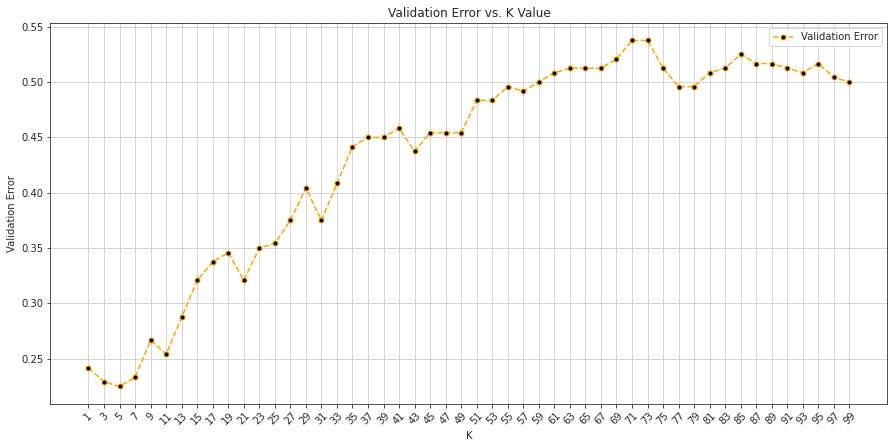

In [13]:
from sklearn.model_selection import cross_val_score

val_error_rate = []
neighbors_range = range(1,100,2)

for i in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    val_error = 1 - cross_val_score(knn, X_train, y_train, cv=5).mean()
    val_error_rate.append(val_error)
    
plt.figure(figsize=(15,7))
plt.plot(neighbors_range, val_error_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')

plt.xticks(np.arange(neighbors_range.start, neighbors_range.stop, neighbors_range.step), rotation=45)
plt.grid()
plt.legend()
plt.title('Validation Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Validation Error')
plt.show()

## Curse of Dimensionality

The KNN classifier is simple and works quite well given a good distance metric and enough labeled training data. However, the main problem is that KNN doesn't work well with high dimensional inputs. In high dimension space, data points ten to be far to each other. This problem is known as the **curse of dimensionality**.

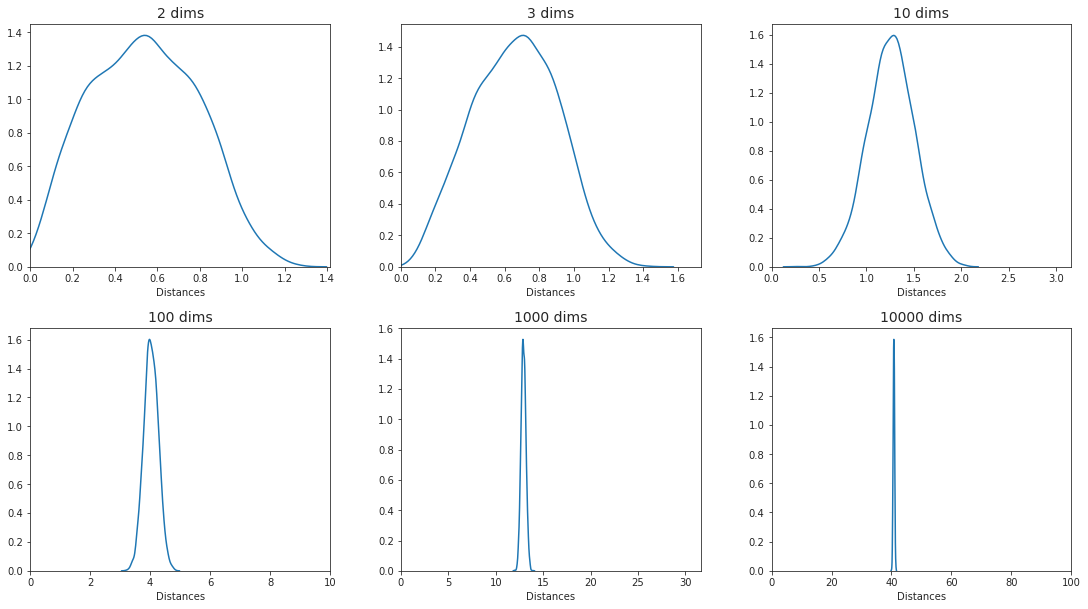

In [14]:
# number of data points
m = 100
# number of dimensions
dimensions = [2, 3, 10, 100, 1000, 10000]

def euclidean_distance(x, y):
    '''Return the euclidean distance between a pair of row vector x and y
    '''
    return np.sqrt(np.dot(x, x) - 2 * np.dot(x, y) + np.dot(y, y))

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
fig.tight_layout(pad=4.0)

for index, n in enumerate(dimensions):
    # Generate m points with n dimensions 
    # that are uniformly distributed in a n-dimensional unit cube
    X = np.random.random(size=(m, n))

    # Collect all distances between all pairs of points
    distances = np.array([ euclidean_distance(X[i], X[j]) for i in range(m-1) for j in range(i+1, m)])

    # Plotting
    ax = axes[index // 3, index % 3]
    sns.distplot(distances, kde=True, hist=False, ax=axes[index // 3, index % 3])
    ax.set_xlim(0, np.sqrt(n))
    ax.set_title(f'{n} dims', fontsize=14)
    ax.set_xlabel('Distances')
plt.show()